<a href="https://colab.research.google.com/github/exterm/uvm-pocs/blob/main/pocs08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib as plt 
import random
from matplotlib import cm
from IPython import display
from time import sleep
from scipy import ndimage
import matplotlib.pyplot as plt

#Model

## Functions to perform percolation


In [3]:
# Site percolation
def run_percolation(world, probability):
    N1 = world.shape[0]
    N2 = world.shape[1]
    for i in range(N1): #for cell in every row
        for j in range(N2): #and every column
            die = random.uniform(0, 1)
            if die < probability:
              world[(i,j)] = 1
            else:
              world[(i,j)] = 0

    return (world)

Percolation in two dimensions (2-d) on a simple square lattice provides a
classic, nutritious example of a phase transition.

Your mission, whether or not you choose to accept it, is to code up and
analyse the L by L square lattice percolation model for varying L.
Take L = 20, 50, 100, 200, 500, and 1000.

(Go higher if you feel L = 1000 is for mere mortals.)
(Go lower if your code explodes.)

Let’s continue with the tree obsession. A site has a tree with probability p,
and a sheep grazing on what’s left of a tree with probability 1 − p.
Forests are defined as any connected component of trees bordered by sheep,
where connections are possible with a site’s four nearest neighbors on a
lattice.

Each square lattice is to be considered as a landscape on which forests and
sheep co-exist.

Do not bagelize (or doughnutize) the landscape (no periodic boundary
conditions—boundaries are boundaries).

(Note: this set up is called site percolation. Bond percolation is the alternate
case when all links between neighboring sites exist with probability p.)
Steps:
7


For each L, run Ntests=100 tests for occupation probability p moving
from 0 to 1 in increments of 10−2. (As for L, you may use a smaller or
larger increment depending on how things go.)

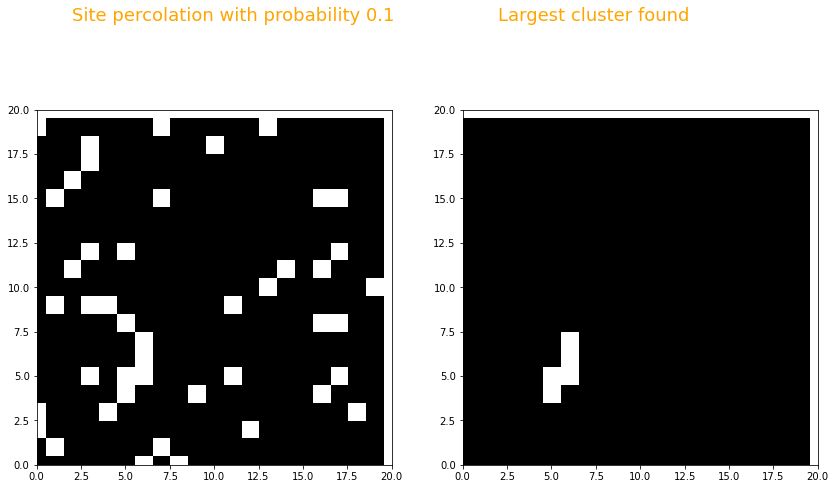

In [ ]:
#@title Visualize percolation { run: "auto" }

# Parameters 
#L = 20, 50, 100, 200, 500, and 1000
#N is  height, width
N2 = 20 #@param {type:"slider", min:20, max:1000, step:10} 
N1 = 20 #@param {type:"slider", min:20, max:1000, step:10} 
# occupation probability
probability_tree = 0.1 #@param {type:"slider", min:0, max:1, step:0.1}
# sheep_grazing = 1 - probability_tree
#initial conditions of zero
world = np.zeros((N1,N2))

world = run_percolation(world,probability_tree) #run model

# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_ylim(0,N1)
ax1.set_xlim(0,N2)
ax2.set_ylim(0,N1)
ax2.set_xlim(0,N2)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

#filter largest cluster
structure = [[0,1,0],[1,1,1],[0,1,0]] #define connection
label_world, nb_labels = ndimage.label(world,structure) #label clusters
sizes = ndimage.sum(world, label_world, range(nb_labels + 1))
mask = sizes >= sizes.max()
binary_img = mask[label_world]

# Plot the world
ax1.imshow((world), cmap=plt.get_cmap(cm.bone), origin = 'lower')
ax2.imshow(binary_img, cmap=plt.get_cmap(cm.bone), origin = 'lower')

# Add label
ax1.text(2, N1+5, f'Site percolation with probability {probability_tree}', color='Orange', fontsize=18)
ax2.text(2, N1+5, f'Largest cluster found', color='Orange', fontsize=18)
plt.show()

In [ ]:
structure

[[0, 1, 0], [1, 1, 1], [0, 1, 0]]

determine the fractional size of the largest connected forest for each of
the Ntests, and find the average of these, Savg.

In [ ]:
# largest cluster / world size 

# for every l 

# for p in range 0 to 1 

# for tries in range 100 

# create array that saves 100 numbers 

# plot the points 

On a single figure, for each L, plot the average Savg as a function of p.

L: 20
....................................................................................................
L: 50
....................................................................................................
L: 100
....................................................................................................
L: 200
....................................................................................................
L: 500
....................................................................................................
L: 1000
....................................................................................................
{0: <matplotlib.collections.PathCollection object at 0x7fa6aeac3a50>, 1: <matplotlib.collections.PathCollection object at 0x7fa6af596250>, 2: <matplotlib.collections.PathCollection object at 0x7fa6ae236b10>, 3: <matplotlib.collections.PathCollection object at 0x7fa6a460cad0>, 4: <matplotlib.collections.PathCollection object at 0x7fa6beff7950>, 5: <mat

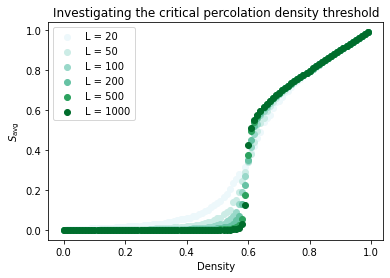

In [84]:
import matplotlib.pyplot as plt

def create_percolated_world(size, density):
  return np.random.choice([0,1], size=(size, size), p=[1-density, density])

Ls = [20, 50, 100, 200, 500, 1000]
colors = ['#edf8fb', '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c']

#define neighborhood
structure = [[0,1,0],[1,1,1],[0,1,0]] #define connection

plots = {}

#for every lattice size
for l in range(len(Ls)):
  L = Ls[l]
  print(f"L: {L}")

  for p in np.arange(0,1,0.01):
    print(".", end='')

    S = []
    for n in range(100):

        world = create_percolated_world(L, p)

        #filter largest cluster
        label_world, nb_labels = ndimage.label(world,structure) #label clusters
        sizes = ndimage.sum(world, label_world, range(nb_labels + 1))
        S.append(sizes.max()/(L*L))

    # plot the mean of the maxima
    plots[l] = plt.scatter(p,np.mean(S),color=colors[l], label=f'L = {L}')
  print()

print(plots)

plt.legend(handles=plots.values())
plt.ylabel('$S_{\\rm avg}$')
plt.xlabel('Density')
plt.title("Investigating the critical percolation density threshold")
plt.savefig("critical_density.png", dpi=600)

Comment on how Savg(p; N ) changes as a function of L and estimate the
critical probability pc (the percolation threshold).

Comment: 

#question 5

5a. using your model from the previous question and your estimate of pc, plot
the distribution of forest sizes (meaning cluster sizes) for p ≃ pc for the
largest L your code and psychological makeup can withstand. (You can
average the distribution over separate simulations.)
Comment on what kind of distribution you find.

In [78]:
#plot the distribution of forest sizes for p = pc
from collections import defaultdict
import pandas as pd

def plot_size_distribution(p,L,repetitions,filename, title):
  S = defaultdict(int)
  print("|" + "."*repetitions + "|")
  print("|", end="")
  for n in range(repetitions):
    print(".", end="")

    #run model
    world = create_percolated_world(L, p)

  #  filter largest cluster
    label_world, nb_labels = ndimage.label(world,structure) #label clusters
    sizes = ndimage.sum(world, label_world, range(nb_labels + 1))
    for s in sizes:
      S[s] += 1

  print("|")
  plt.loglog(10)

  df = pd.DataFrame.from_dict(S, orient='index', columns=['Count'])

  plt.plot(df, 'o', lw=0)
  plt.xlabel('$S$')
  plt.ylabel('Frequency')
  plt.title(title)
  plt.savefig(filename, dpi=600)


|....................................................................................................|
|....................................................................................................|


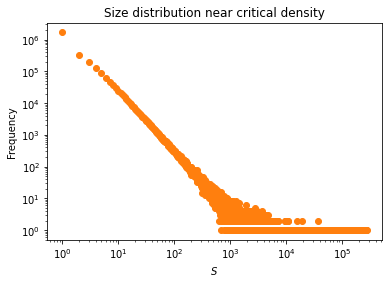

In [79]:
plot_size_distribution(0.59, 1000, 100, "size_distribution5a.png", "Size distribution near critical density")

Comment: 

5b. repeat the above for p = pc/2 and p = pc + (1 − pc)/2, i.e., well below and
well above pc.
Produce plots for both cases, and again, comment on what you find

|....................................................................................................|
|....................................................................................................|


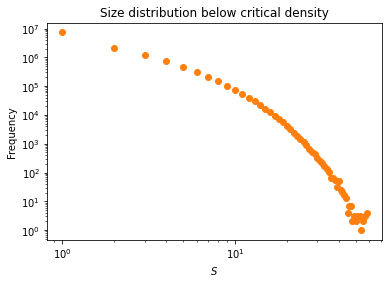

In [81]:
plot_size_distribution(0.59/2, 1000, 100, "size_distribution5b1.png", "Size distribution below critical density")

|....................................................................................................|
|....................................................................................................|


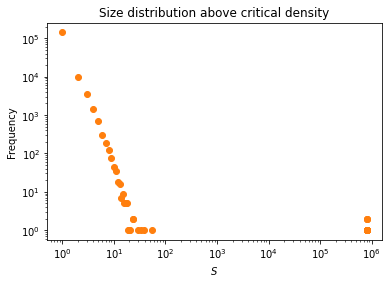

In [80]:
pc = 0.59
p = pc + (1 - pc)/2

plot_size_distribution(p, 1000, 100, "size_distribution5b2.png", "Size distribution above critical density")

Comment: 